In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *
from Bio.PDB.Polypeptide import three_to_one


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
data = pd.read_csv("/Users/weilu/Research/database/membrane_training_set/proteins-2019-05-01.csv")
data.pdbid = data.pdbid.apply(lambda x: x[2:-1])

In [4]:
info = pd.read_csv("/Users/weilu/Research/database/membrane_contact_dtabase/for_iter0_training_complete_jun06.csv", index_col=0)
info = info.drop_duplicates().reset_index(drop=True)

In [5]:
data["Protein"] = data["pdbid"]

In [6]:
info.shape

(1560, 3)

In [7]:
len(info.Protein.unique())

1560

In [8]:
d = data.query("classtype_id == 1").reset_index(drop=True)
d = d.drop_duplicates(subset="Protein").reset_index(drop=True)

In [9]:
d.shape

(1592, 32)

In [10]:
d = d.merge(info, on="Protein")

In [11]:
d.shape

(1560, 34)

In [24]:
d.query("Protein == '5mg3'").T

,926
id,3306
ordering,560
family_name_cache,Protein translocase
species_name_cache,Escherichia coli
membrane_name_cache,Gram-neg. inner
name,Holo-translocon
description,NaN
comments,NaN
pdbid,5mg3
resolution,14.0


In [13]:
d.query("Length > 500").shape


(1065, 34)

In [19]:
d.columns

Index(['id', 'ordering', 'family_name_cache', 'species_name_cache',
       'membrane_name_cache', 'name', 'description', 'comments', 'pdbid',
       'resolution', 'topology_subunit', 'topology_show_in', 'thickness',
       'thicknesserror', 'subunit_segments', 'tilt', 'tilterror', 'gibbs',
       'tau', 'verification', 'membrane_id', 'species_id', 'family_id',
       'superfamily_id', 'classtype_id', 'type_id',
       'secondary_representations_count', 'structure_subunits_count',
       'citations_count', 'created_at', 'updated_at', 'Protein', 'Length',
       'InMembraneRatio'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1643ae48>]],
      dtype=object)

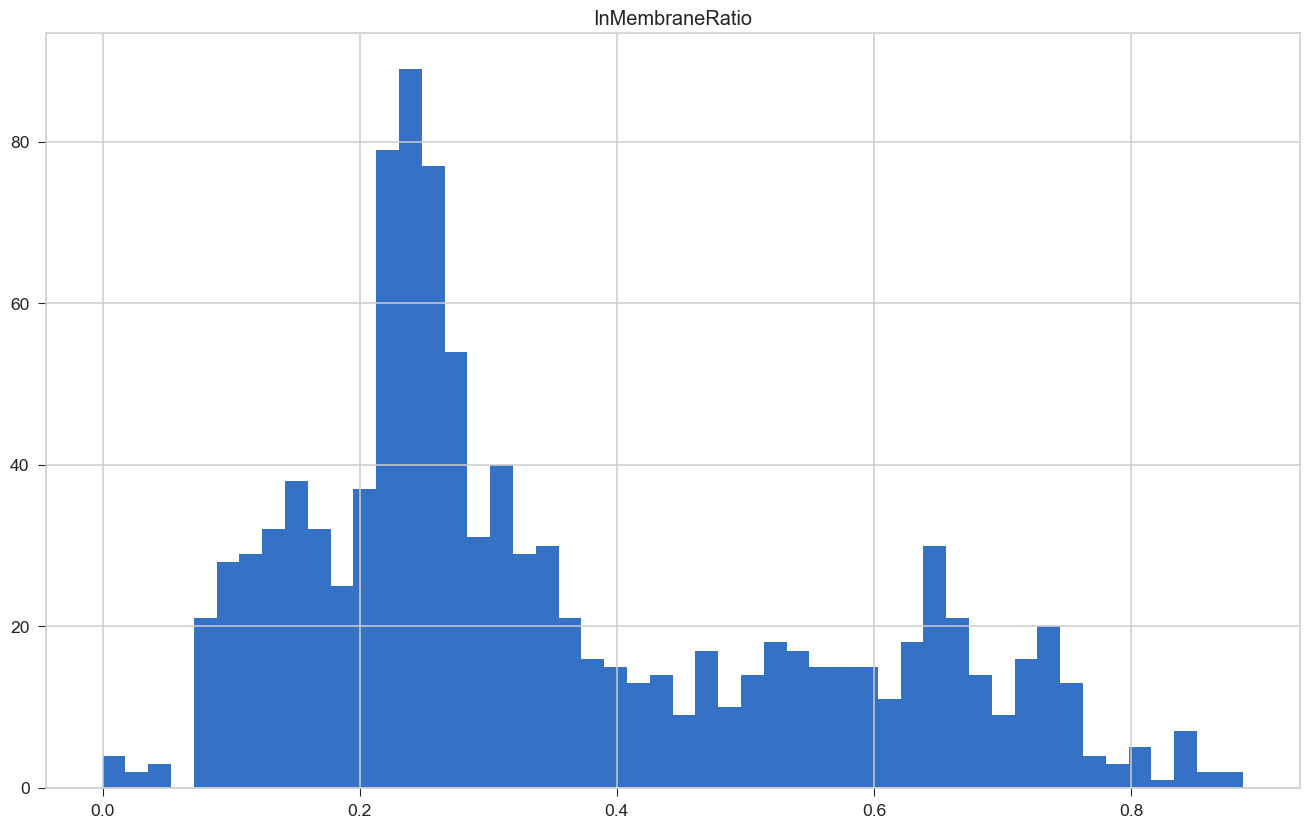

In [18]:
d.query("Length > 500").hist("InMembraneRatio", bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17106630>]],
      dtype=object)

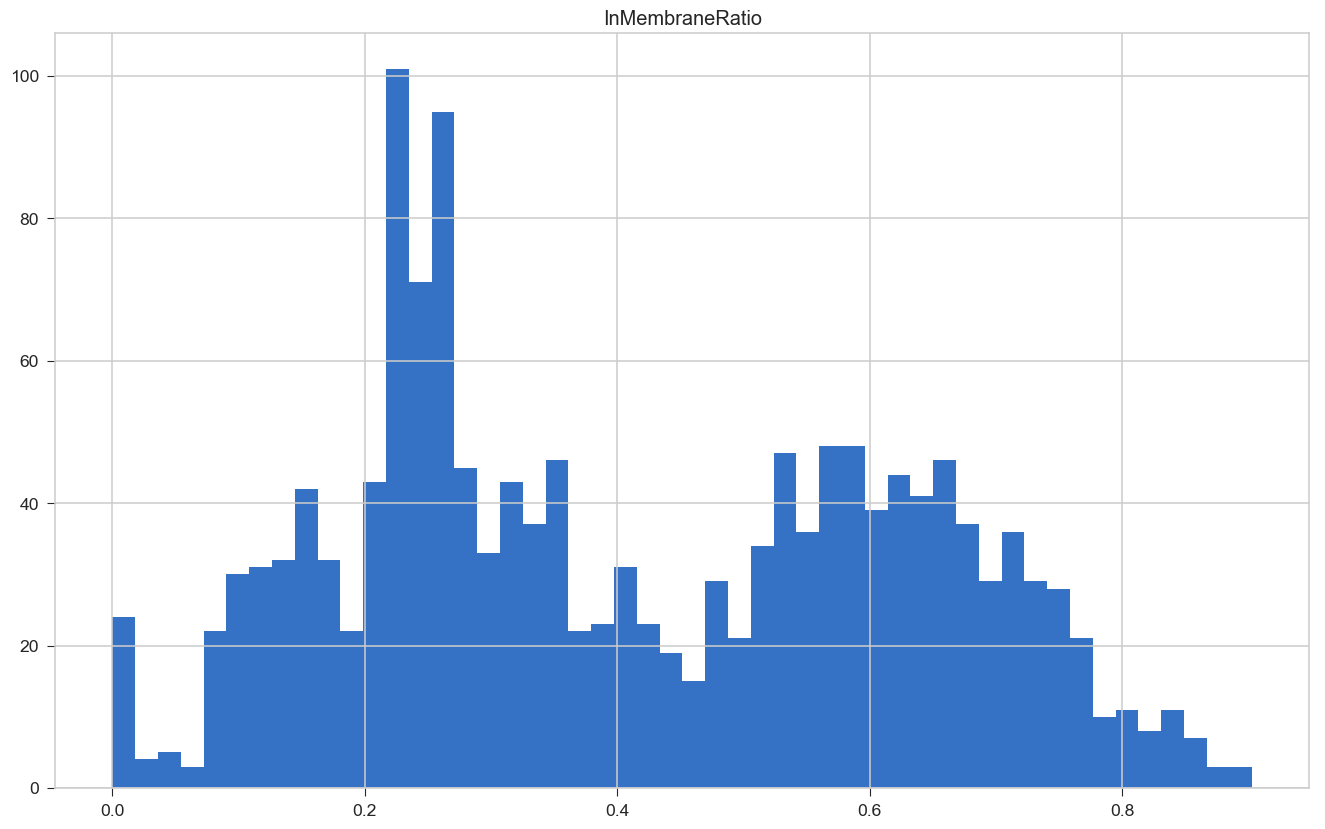

In [17]:
d.hist("InMembraneRatio", bins=50)

In [22]:
d.query("structure_subunits_count == 1 and InMembraneRatio < 0.46 and InMembraneRatio > 0.2 and Length > 500").sort_values("InMembraneRatio")[['pdbid', 'subunit_segments'
                                                                                                                                               , 'type_id','secondary_representations_count', 'structure_subunits_count']]


,pdbid,subunit_segments,type_id,secondary_representations_count,structure_subunits_count
513,4ksd,12,1,0,1
1132,6bhu,17,1,0,1
334,3vg9,7,1,1,1
910,5uar,12,1,0,1
1151,6c0v,12,1,0,1
1039,5w81,12,1,0,1
1431,6msm,12,1,0,1
951,5uja,17,1,0,1
1163,6fn4,12,1,0,1
1462,6q81,12,1,0,1


In [20]:
d.query("InMembraneRatio < 0.46 and InMembraneRatio > 0.2 and Length > 500").sort_values("InMembraneRatio")[['pdbid', 'type_id','secondary_representations_count', 'structure_subunits_count']]


,pdbid,type_id,secondary_representations_count,structure_subunits_count
1116,6bpq,1,0,4
306,3sya,1,3,4
528,3wgu,1,1,3
164,5aji,1,4,7
1387,6hco,1,0,2
921,5tji,1,0,4
982,5x41,1,0,2
1215,6f0k,1,0,4
513,4ksd,1,0,1
1158,6be1,1,0,5


In [14]:
d.query("InMembraneRatio < 0.46 and InMembraneRatio > 0.2 and Length > 500").sort_values("InMembraneRatio")


,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,comments,pdbid,resolution,...,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at,Protein,Length,InMembraneRatio
1116,3626,790.0,Polycystin cation channel,Ficedula albicollis,Eykaryo. plasma,TRPM8 channel,NaN,NaN,6bpq,4.10,...,1,1,0,4,0,2018-08-13 03:55:09 UTC,2018-08-13 03:55:09 UTC,6bpq,3072,0.201172
306,1343,700.0,Inward rectifier potassium channels,Mus musculus,Eykaryo. plasma,G protein-activated inward rectifier potassium...,NaN,NaN,3sya,2.98,...,1,1,3,4,0,2018-08-13 03:51:42 UTC,2018-08-13 03:51:42 UTC,3sya,1312,0.201220
528,2279,452.0,P-ATPase,Sus scrofa,Eykaryo. plasma,"Sodium-potassium pump, Na+ bound E1P preceedin...",NaN,NaN,3wgu,2.80,...,1,1,1,3,0,2018-08-13 03:53:49 UTC,2018-08-13 03:53:49 UTC,3wgu,1331,0.201352
164,813,1006.0,Small conductance mechanosensitive ion channel...,Escherichia coli,Gram-neg. inner,"Mechanosensitive channel protein MscS, open state",NaN,NaN,5aji,2.99,...,1,1,4,7,0,2018-08-13 03:50:49 UTC,2018-08-13 03:50:49 UTC,5aji,1802,0.201443
1387,4138,529.0,ABC transporter G family,Homo sapiens,Eykaryo. plasma,"ABC transporter ABCG2, structure 6",NaN,NaN,6hco,3.58,...,1,1,0,2,0,2018-11-07 23:56:06 UTC,2018-11-07 23:56:06 UTC,6hco,1576,0.201777
921,3298,618.0,Slo potassium channels,Aplysia californica,Eykaryo. plasma,High conductance calcium-activated potassium c...,NaN,NaN,5tji,3.80,...,1,1,0,4,0,2018-08-13 03:54:54 UTC,2018-08-13 03:54:54 UTC,5tji,3528,0.202381
982,3412,1315.0,Cobalt uptake transporter,Rhodobacter capsulatus,Gram-neg. inner,"CbiMQO-complex, structure 2",NaN,Tilt angles were calculated as for non-TM subu...,5x41,3.47,...,1,1,0,2,0,2018-08-13 03:55:00 UTC,2018-08-13 03:55:00 UTC,5x41,988,0.202429
1215,3850,298.0,Polysulfide reductase,Rhodothermus marinus,Gram-neg. inner,Polysulphide reductase complex,NaN,NaN,6f0k,3.87,...,1,1,0,4,0,2018-08-13 03:55:16 UTC,2018-08-13 03:55:16 UTC,6f0k,2504,0.204473
513,2240,515.0,Multidrug resistance exporter (MDR),Mus musculus,Eykaryo. plasma,"P-glycoprotein, inward-facing conformation 2c",NaN,NaN,4ksd,4.10,...,1,1,0,1,0,2018-08-13 03:53:44 UTC,2018-08-13 03:53:44 UTC,4ksd,1300,0.204615
1158,3705,925.0,Ligand-gated ion channel of neurotransmitter r...,Mus musculus,Eykaryo. plasma,"5-hydroxytryptamine receptor 3A, structure 2",NaN,NaN,6be1,4.31,...,1,1,0,5,0,2018-08-13 03:55:11 UTC,2018-08-13 03:55:11 UTC,6be1,1995,0.205013


In [ ]:
["4nv6", "4p79", "5dsg", "6g7o", "6a93"]
["4zyo", "5n6m"]

In [ ]:
# two chains
["4rws", "4xt3", "6iu3", "6iu4"]

In [ ]:
# many, seems like two chain
["5uig"]

In [26]:
d.query("InMembraneRatio < 0.5 and InMembraneRatio > 0.4 and Length < 500")


,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,comments,pdbid,resolution,...,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at,Protein,Length,InMembraneRatio
59,93,171.0,"G-protein coupled receptors, family A",Bos taurus,Eykaryo. plasma,"Rhodopsin, inactive, with 11-cis retinal",NaN,Structures of intermediate states: bathorhodop...,1gzm,2.70,...,1,1,4,1,6,2018-08-13 03:49:53 UTC,2018-11-09 00:12:32 UTC,1gzm,328,0.481707
133,704,173.0,"G-protein coupled receptors, family A",Bos taurus,Eykaryo. plasma,"Rhodopsin, partially active, photobleached",NaN,"This is probably a photobleached state, not me...",2i37,4.15,...,1,1,0,1,0,2018-08-13 03:50:42 UTC,2018-08-13 03:50:42 UTC,2i37,317,0.492114
219,972,1362.0,Vitamin K epoxide reductase,Synechococcus sp.,Gram-neg. inner,"Vitamin K epoxide reductase, structure 2",NaN,NaN,4nv6,4.19,...,1,1,0,1,0,2018-08-13 03:51:04 UTC,2018-11-06 17:09:22 UTC,4nv6,264,0.405303
247,1023,177.0,"G-protein coupled receptors, family A",Todarodes pacificus,Eykaryo. plasma,"Squid rhodopsin, inactive, with 11-cis retinal",NaN,NaN,2ziy,3.70,...,1,1,2,1,0,2018-08-13 03:51:10 UTC,2018-11-09 00:14:27 UTC,2ziy,370,0.435135
268,1101,169.0,"G-protein coupled receptors, family A",Bos taurus,Eykaryo. plasma,"Rhodopsin, inactive, structure 2 (with beta-io...",NaN,NaN,3oax,2.6,...,1,1,2,1,0,2018-08-13 03:51:21 UTC,2018-08-13 03:51:21 UTC,3oax,348,0.456897
270,1103,165.0,"G-protein coupled receptors, family A",Bos taurus,Eykaryo. plasma,"Rhodopsin, active, with transducin peptide",NaN,NaN,4x1h,2.29,...,1,1,4,1,0,2018-08-13 03:51:21 UTC,2018-11-09 00:19:01 UTC,4x1h,337,0.465875
279,1119,259.0,Light-harvesting complexes from bacteria,Rhodospirillum rubrum,Gram-neg. inner,"Light-harvesting complex LH1, alpha chain",NaN,Structure in chloroform/methanol.,1xrd,NMR,...,1,1,0,1,0,2018-08-13 03:51:23 UTC,2018-08-13 03:51:23 UTC,1xrd,52,0.442308
291,1242,63.0,"G-protein coupled receptors, family A",Homo sapiens,Eykaryo. plasma,"Adenosine receptor A2a, engineered, intermedia...",NaN,NaN,2ydv,2.6,...,1,1,1,1,0,2018-08-13 03:51:35 UTC,2018-11-08 23:06:48 UTC,2ydv,315,0.479365
368,1988,1449.0,Peptidase family M48,Homo sapiens,Endoplasm. reticulum,"CAAX prenyl protease 1 homolog, structure 2",NaN,NaN,4aw6,3.4,...,1,1,1,1,0,2018-08-13 03:53:22 UTC,2018-08-13 03:53:22 UTC,4aw6,427,0.402810
410,2066,1450.0,Peptidase family M48,Saccharomyces mikatae,Endoplasm. reticulum,CaaX Protease Ste24p,NaN,NaN,4il3,3.10,...,1,1,0,1,0,2018-08-13 03:53:29 UTC,2018-08-13 03:53:29 UTC,4il3,422,0.424171


In [48]:
chosen = info.query("structure_subunits_count == 1 and InMembraneRatio < 0.5 and Length < 500")

In [50]:
chosen.shape

(102, 34)

In [57]:
picked = chosen.groupby("superfamily_id").apply(pd.DataFrame.sample, 1)

In [62]:
picked = picked.reset_index(drop=True)

In [63]:
picked.to_csv("/Users/weilu/Research/database/hybrid_prediction_database/picked.csv")

In [52]:
chosen["superfamily_id"].unique()

array([  6, 173,  18,   2, 394,  63, 194, 202, 431, 406, 244, 327, 456,
       466, 470, 476])

In [68]:
chosen = info.query("structure_subunits_count == 1 and InMembraneRatio < 0.6 and InMembraneRatio > 0.4 and Length < 500")

chosen.shape

(165, 34)

In [74]:
picked2 = chosen.sort_values("Length").groupby("superfamily_id").head(1).reset_index(drop=True)

In [75]:
picked2.to_csv("/Users/weilu/Research/database/hybrid_prediction_database/picked2.csv")

In [69]:
chosen["superfamily_id"].unique()

array([ 15,   6,  14, 220,  21, 173,  18,   2, 267, 159,  64, 392, 394,
        63, 218, 396,   8, 202, 194, 409, 431, 244, 327, 456, 466, 415,
       493,  92])

In [66]:
a = pd.read_csv("/Users/weilu/Research/database/hybrid_prediction_database/picked.csv", index_col=0)
pdb_list = a["Protein"].to_list()



['1xrd',
 '5uiw',
 '3kp9',
 '2mi2',
 '3e9j',
 '6akg',
 '5y83',
 '2n7r',
 '5tcx',
 '4aw6',
 '5d91',
 '4zyo',
 '5ktf',
 '5vrh',
 '5mm0',
 '6bms']

In [67]:
picked

,Protein,Length,InMembraneRatio,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,...,species_id,family_id,superfamily_id,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at
0,1xrd,52,0.442308,1119,259.0,Light-harvesting complexes from bacteria,Rhodospirillum rubrum,Gram-neg. inner,"Light-harvesting complex LH1, alpha chain",NaN,...,321,1,2,1,1,0,1,0,2018-08-13 03:51:23 UTC,2018-08-13 03:51:23 UTC
1,5uiw,365,0.452055,3468,96.0,"G-protein coupled receptors, family A",Homo sapiens,Eykaryo. plasma,"C-C chemokine receptor type 5, inactive state,...",NaN,...,14,14,6,1,1,0,1,0,2018-08-13 03:55:03 UTC,2018-11-08 23:33:44 UTC
2,3kp9,259,0.424710,4132,1361.0,Vitamin K epoxide reductase,Synechococcus sp.,Gram-neg. inner,"Vitamin K epoxide reductase, structure 1",NaN,...,133,307,18,1,1,0,1,0,2018-11-06 17:10:58 UTC,2018-11-06 17:10:58 UTC
3,2mi2,104,0.317308,2443,1470.0,TatB protein,Escherichia coli,Gram-neg. inner,Sec-independent protein translocase protein TatB,NaN,...,9,699,63,1,1,0,1,0,2018-08-13 03:53:56 UTC,2018-08-13 03:53:56 UTC
4,3e9j,322,0.270186,2136,1341.0,Disulfide bond oxidoreductase-B (DsbB),Escherichia coli,Gram-neg. inner,"DsbB - DsbA complex, conformation 4",NaN,...,9,247,173,1,1,0,1,0,2018-08-13 03:53:35 UTC,2018-08-13 03:53:35 UTC
5,6akg,301,0.285714,4289,1015.0,Claudins,Mus musculus,Eykaryo. plasma,"Claudin-3, structure 1",NaN,...,52,702,194,1,1,0,1,0,2019-02-23 21:34:55 UTC,2019-02-23 21:34:55 UTC
6,5y83,342,0.327485,3927,1226.0,OxaA/YidC,Thermotoga maritima,Gram-neg. inner,Membrane protein insertase YidC,NaN,...,61,293,202,1,1,0,1,0,2018-08-13 03:55:19 UTC,2018-08-13 03:55:19 UTC
7,2n7r,46,0.434783,3046,1398.0,Gamma-secretase,Homo sapiens,Endoplasm. reticulum,"Nicastrin, TM helix",NaN,...,14,767,244,1,1,1,1,0,2018-08-13 03:54:37 UTC,2019-04-19 16:21:00 UTC
8,5tcx,206,0.412621,3253,1541.0,Tetraspanin,Homo sapiens,Eykaryo. plasma,CD81 antigen,NaN,...,14,567,327,1,1,0,1,0,2018-08-13 03:54:51 UTC,2018-08-13 03:54:51 UTC
9,4aw6,427,0.402810,1988,1449.0,Peptidase family M48,Homo sapiens,Endoplasm. reticulum,"CAAX prenyl protease 1 homolog, structure 2",NaN,...,14,646,394,1,1,1,1,0,2018-08-13 03:53:22 UTC,2018-08-13 03:53:22 UTC


In [76]:
picked2

,Protein,Length,InMembraneRatio,id,ordering,family_name_cache,species_name_cache,membrane_name_cache,name,description,...,species_id,family_id,superfamily_id,classtype_id,type_id,secondary_representations_count,structure_subunits_count,citations_count,created_at,updated_at
0,2n7r,46,0.434783,3046,1398.0,Gamma-secretase,Homo sapiens,Endoplasm. reticulum,"Nicastrin, TM helix",NaN,...,14,767,244,1,1,1,1,0,2018-08-13 03:54:37 UTC,2019-04-19 16:21:00 UTC
1,1jo5,48,0.520833,1320,263.0,Light-harvesting complexes from bacteria,Rhodobacter sphaeroides,Gram-neg. inner,"Light-harvesting protein B-875, beta chain",NaN,...,31,1,2,1,1,1,1,0,2018-08-13 03:51:42 UTC,2018-08-13 03:51:42 UTC
2,5ktf,73,0.410959,3353,1543.0,CD36 glycoprotein,Mus musculus,Eykaryo. plasma,Scavenger receptor B-1,NaN,...,52,840,456,1,1,0,1,0,2018-08-13 03:54:57 UTC,2018-08-13 03:54:57 UTC
3,2moz,81,0.506173,2498,1347.0,MerF Mercuric ion uptake family,Morganella morganii,Gram-neg. inner,"MerF bacterial mercury uptake transporter, str...",NaN,...,300,322,218,1,1,0,1,0,2018-08-13 03:53:59 UTC,2018-08-13 03:53:59 UTC
4,3zd0,85,0.517647,2254,1479.0,Nucleocapsid P7 protein,Hepatitis C virus,Endoplasm. reticulum,"P7 protein (747-809), structure 1",NaN,...,328,674,396,1,1,0,1,0,2018-08-13 03:53:45 UTC,2018-08-13 03:53:45 UTC
5,2lor,97,0.525773,1962,1444.0,Transmembrane protein 141,Homo sapiens,Undefined,Transmembrane protein 141,NaN,...,14,641,392,1,1,0,1,0,2018-08-13 03:53:19 UTC,2018-08-13 03:53:19 UTC
6,2ksr,140,0.592857,321,956.0,Ligand-gated ion channel of neurotransmitter r...,Homo sapiens,Eykaryo. plasma,"Nicotinic acetylcholine receptor, beta-2, in h...",NaN,...,14,22,14,1,1,0,1,0,2018-08-13 03:50:09 UTC,2018-08-13 03:50:09 UTC
7,3wkv,140,0.571429,2381,805.0,Voltage-sensing proton channel,Mus musculus,Eykaryo. plasma,Voltage-gated sensor domain of proton channel Hv1,NaN,...,52,806,8,1,1,0,1,0,2018-08-13 03:53:54 UTC,2018-08-13 03:53:54 UTC
8,4p79,173,0.497110,2447,1013.0,Claudins,Mus musculus,Eykaryo. plasma,Claudin-15,NaN,...,52,702,194,1,1,0,1,0,2018-08-13 03:53:56 UTC,2018-08-13 03:53:56 UTC
9,2k74,183,0.530055,819,1335.0,Disulfide bond oxidoreductase-B (DsbB),Escherichia coli,Gram-neg. inner,"Disulfide bond formation protein B, conformati...",NaN,...,9,247,173,1,1,1,1,0,2018-08-13 03:50:49 UTC,2018-08-13 03:50:49 UTC
